In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
path = "Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Abraham Lincoln Birthplace,Abraham Lincoln Birthplace National Historical...,National Historical Park,KY,SER,ABLI,1.0
1,Acadia,Acadia National Park,National Park,ME,NER,ACAD,1.0
2,Adams,Adams National Historical Park,National Historical Park,MA,NER,ADAM,1.0
3,African Burial Ground,African Burial Ground National Monument,National Monument,NY,NER,AFBG,1.0
4,Agate Fossil Beds,Agate Fossil Beds National Monument,National Monument,NE,MWR,AGFO,1.0


In [13]:
df = pd.read_csv("./TDx_tracker.csv")

In [14]:
df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,10/17/2023,Yosemite National Park,Mariposa Grove Road Repair,Mariposa Grove Road is closed October 16–27 fo...,work-zone,['Mariposa Grove Road'],all-lanes-closed,2023-10-15T23:00:00Z,2023-10-27T14:00:00Z,NaN,NaN,NaN
1,10/17/2023,Yosemite National Park,Glacier Point Road Construction,"Expect 30-minute delays, Monday through Friday...",work-zone,['Glacier Point Road'],flagging,2023-05-01T10:15:00Z,2023-10-31T10:15:00Z,NaN,NaN,NaN
2,10/17/2023,Mojave National Preserve,Cima Road Closed to ALL VEHICLES due to Constr...,Cima Road is undergoing a major renovation for...,work-zone,['Cima Road'],all-lanes-closed,2023-07-26T09:54:00Z,2024-03-31T09:49:00Z,NaN,NaN,NaN
3,10/17/2023,Acadia National Park,Expect carriage road construction between inte...,Watch for heavy equipment and rough surfaces o...,work-zone,['Carriage Road between intersections 10 and 11'],unknown,2023-09-29T02:48:00Z,2023-10-31T02:48:00Z,NaN,NaN,NaN
4,10/17/2023,Acadia National Park,Blasting and heavy construction at Park Headqu...,As part of the construction of the park's new ...,work-zone,['Acadia Park Headquarters'],some-lanes-closed,2023-09-29T03:41:00Z,2025-09-30T03:41:00Z,NaN,NaN,NaN


In [15]:
df.shape

(321, 12)

In [16]:
df.park.value_counts()

Crater Lake National Park                     54
Great Smoky Mountains National Park           38
Mojave National Preserve                      37
Yosemite National Park                        28
Shenandoah National Park                      26
Zion National Park                            15
Death Valley National Park                    14
Bryce Canyon National Park                    12
Dinosaur National Monument                    12
Guadalupe Mountains National Park              8
Padre Island National Seashore                 8
Organ Pipe Cactus National Monument            8
Acadia National Park                           7
Golden Gate National Recreation Area           6
Point Reyes National Seashore                  6
Buffalo National River                         6
Olympic National Park                          5
Fort Point National Historic Site              5
Redwood National Park                          5
Ozark National Scenic Riverways                4
Natchez Trace Parkwa

In [17]:
len(df.park.unique())

26

In [33]:
df['date'] = pd.to_datetime(df.date)


In [34]:
df.date.value_counts()

2024-03-04    83
2024-04-02    62
2024-02-05    61
2024-04-19    59
2023-10-17    11
2023-10-23    11
2024-02-01     8
2024-01-11     5
2024-01-18     4
2023-11-27     4
2023-12-18     4
2024-01-25     3
2024-01-04     3
2023-12-28     3
Name: date, dtype: int64

In [35]:
df = df.sort_values(by=['date'])

In [36]:
running_park_list = []
date_list = []
park_count_list = []

for x in df.date.unique():
    df_date = df.loc[df['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17T00:00:00.000000000 :  11
Yosemite National Park
Acadia National Park
Mojave National Preserve
Olympic National Park
Golden Gate National Recreation Area
Natchez Trace Parkway
Dinosaur National Monument
2023-10-23T00:00:00.000000000 :  11
2023-11-27T00:00:00.000000000 :  4
Padre Island National Seashore
2023-12-18T00:00:00.000000000 :  4
Fort Point National Historic Site
Muir Woods National Monument
2023-12-28T00:00:00.000000000 :  3
2024-01-04T00:00:00.000000000 :  3
2024-01-11T00:00:00.000000000 :  5
Shenandoah National Park
2024-01-18T00:00:00.000000000 :  4
2024-01-25T00:00:00.000000000 :  3
2024-02-01T00:00:00.000000000 :  8
2024-02-05T00:00:00.000000000 :  61
Crater Lake National Park
Point Reyes National Seashore
Bryce Canyon National Park
Zion National Park
Organ Pipe Cactus National Monument
Death Valley National Park
Valley Forge National Historical Park
Redwood National Park
Guadalupe Mountains National Park
2024-03-04T00:00:00.000000000 :  83
Great Smoky Mountains

In [37]:
park_count_list

[7, 7, 8, 10, 10, 10, 11, 11, 11, 11, 20, 23, 25, 26]

In [38]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])
print(df_count['date'].dtypes)


datetime64[ns]


In [39]:
df_count.sort_values(by=['date'])

,date,count of parks
0,2023-10-17,7
1,2023-10-23,7
2,2023-11-27,8
3,2023-12-18,10
4,2023-12-28,10
5,2024-01-04,10
6,2024-01-11,11
7,2024-01-18,11
8,2024-01-25,11
9,2024-02-01,11


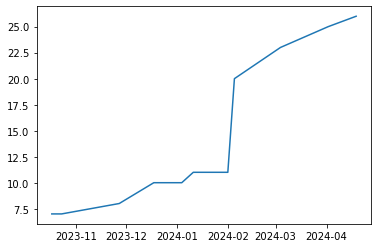

In [40]:
plt.plot(df_count.date, df_count['count of parks'])



[]

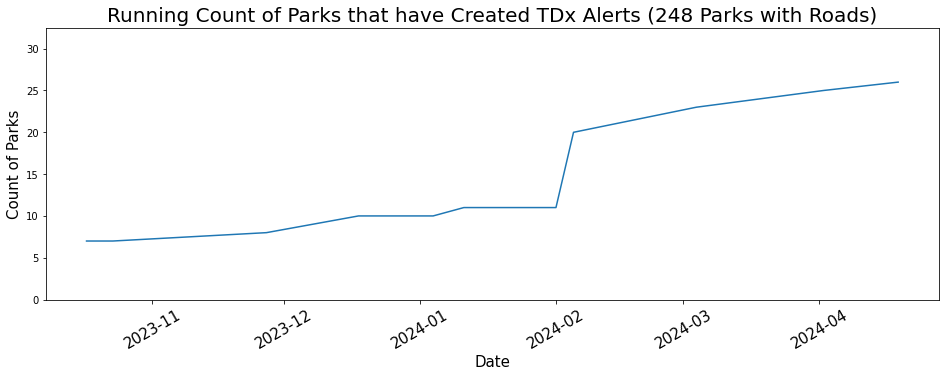

In [42]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df_count.date, df_count['count of parks'])

# Adding a plot title and customizing its font size
plt.title('Running Count of Parks that have Created TDx Alerts (248 Parks with Roads)', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count of Parks', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)
plt.ylim([0,max(df_count['count of parks'])*1.25])

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()
